In [37]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [80]:
# Read Data
rap_df = pd.read_csv("topSellingRappers_1998-2023.csv")
rap_df = rap_df.drop(['Unnamed: 0'], axis=1)

In [81]:
# Extract strings to new column to broaden location data
rap_df['State/Country'] = rap_df['City of Influence']

for index, row in rap_df.iterrows():
    if rap_df.at[index, 'State/Country'] != "West Germany":
        rap_df.at[index, 'State/Country'] = rap_df.at[index, 'State/Country'].split(", ", 1)[1]

print(rap_df.head())

         Top Artists  Year        City of Influence State/Country
0                DMX  1998        Yonkers, New York      New York
1  Silkk The Shocker  1998   New Orleans, Louisiana     Louisiana
2              Jay-Z  1998  New York City, New York      New York
3           Mystikal  1998   New Orleans, Louisiana     Louisiana
4         Method Man  1998  New York City, New York      New York


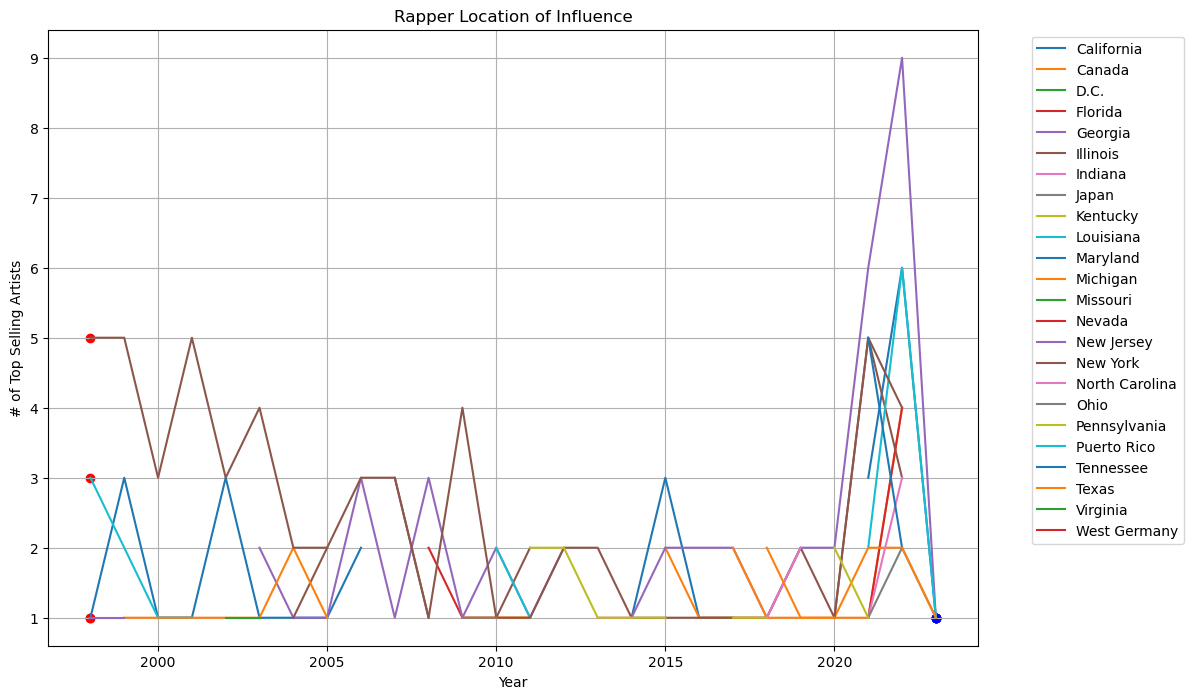

In [134]:
# Group by 'Year' and 'State', then count occurrences
counts = rap_df.groupby(['Year', 'State/Country']).size().unstack().T

plt.figure(figsize=(12, 8))

# Plot each state as a separate line
for state in counts.index:
    plt.plot(counts.columns, counts.loc[state], label=state)
    # Add points at the start and end of each line
    plt.scatter(counts.columns[0], counts.loc[state, counts.columns[0]], color='red', marker='o')
    plt.scatter(counts.columns[-1], counts.loc[state, counts.columns[-1]], color='blue', marker='o')

# Customize the plot

plt.xlabel('Year')
plt.ylabel('# of Top Selling Artists')
plt.title('Rapper Location of Influence')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)

# Show the plot
plt.show()